In [145]:
import numpy as np
import sklearn.neural_network as sknn
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.model_selection import train_test_split  
import matplotlib.pyplot as plt
from pandas import DataFrame, read_csv


#### Organização do dataset entre conjunto de treinamento e teste

In [186]:
##Carregamento do Dataset de Cancer e divisão entre caracteristicas e label
data = pd.read_csv('datasets/cancer_dataset_treated.csv',header=None,dtype=float,sep=',')

X = data.iloc[:,0:9].as_matrix()
y = data.iloc[:,9:11].as_matrix()

##Separação entre conjunto treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
scaler = StandardScaler()  
scaler.fit(X_train)
pd.read_excel
X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)  


C:\Users\mathe\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.
C:\Users\mathe\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


#### Definição de Hiperparamêtros

In [187]:
n_inputs = 9 ## número de entradas da mlp
n_hidden1 = 10 ## número de neurônios na camada escondida
n_outputs = 2 ## número de neurônios na camada de saída
alpha = 0.02 ## tamanho do passo

#### Definição da MLP e treinamento 

In [188]:
mlp = sknn.MLPRegressor(hidden_layer_sizes=(n_inputs, n_hidden1, n_outputs), max_iter=2000, learning_rate_init=alpha,
                    validation_fraction=0.3, n_iter_no_change=100, activation='relu')
fit = mlp.fit(X_train, y_train)

No handles with labels found to put in legend.


MSE: 0.045714285714285714 Sensibilidade: 0.9428571428571428 Acurácia: 0.9542857142857143


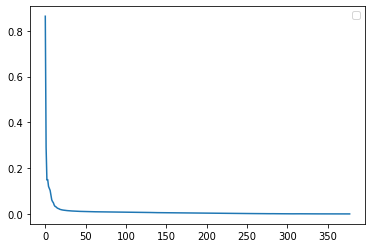

In [189]:
predictions = mlp.predict(X_test) 
new_predictions = []
uns = 0
zeros = 0
for prediction1,prediction2 in predictions:
    if(prediction1>prediction2):
        new_predictions.append(1)
    else:
        new_predictions.append(0)
predictions = new_predictions

new_y=[]
for y1,y2 in y_test:
    new_y.append(y1)

tp,fn,fp,tn = confusion_matrix(predictions,new_y)
sens = sensibilidade(tp,fn,fp,tn)
acc = acuracia(tp,fn,fp,tn)


MSE = np.sum((np.asarray(predictions) - np.asarray(new_y))**2)/len(y_test)
print('MSE:',MSE,'Sensibilidade:',sens,'Acurácia:',acc)





plt.plot(fit.loss_curve_)
##plt.plot(y_test, label='Real')
##plt.plot(predictions, label='Predicted')
plt.legend()
#plt.plot(y_test - predictions)
#for i in range(0,len(predictions)):
# print(predictions[i],y_test[i])

In [173]:
def confusion_matrix(predictions,y_test):
    tp,fp,fn,tn = (0,0,0,0)
    for i in range(0,len(predictions)):
        p = predictions[i]
        y = y_test[i]
        if(p==1 and y==1):
            tp = tp+1
        elif(p==0 and y==1):
            fn = fn+1
        elif(p==1 and y==0):
            fp = fp+1
        else:
            tn = tn+1
    return tp,fn,fp,tn
def sensibilidade(tp,fn,fp,tn):
    return tp/(tp+fn)
    
def acuracia(tp,fn,fp,tn):
    return (tp+tn)/(tp+tn+fp+fn)